<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module4_CaravanWithLASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [2]:
#!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 58 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [3]:
Caravan = pd.read_csv('ML_656/Caravan.csv', index_col=0) 

In [4]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [5]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,...,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,...,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1

In [6]:
Caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

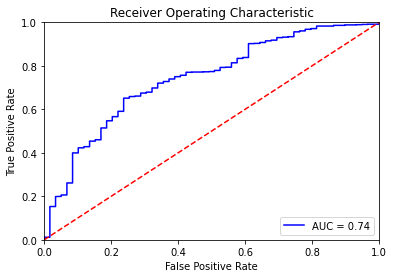

In [ ]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), res.predict(Test)) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

In [10]:
Train, Test = train_test_split(Caravan, test_size=0.25, random_state=1)

In [11]:
X_train = Train.drop(['Purchase'], axis=1)
y_train = Train['Purchase']
X_test = Test.drop(['Purchase'], axis=1)
y_test = Test['Purchase']

In [19]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_model.fit(X_train,y_train)
y_pred_logistic = logistic_model.predict(X_test)
np.sum(y_pred_logistic == 'Yes')

4

In [20]:
confusion_matrix(y_test, y_pred_logistic)

array([[1369,    4],
       [  83,    0]])

In [21]:
y_pred_logistic = logistic_model.predict_proba(X_test)
def Extract(lst): 
    return [item[0] for item in lst] 
y_pred_logistic = Extract(y_pred_logistic)

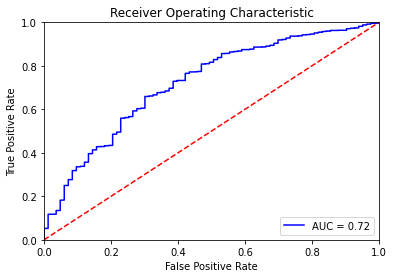

In [22]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_logistic) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

In [25]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
np.sum(y_pred_LDA == 'Yes')

19

In [26]:
confusion_matrix(y_test, y_pred_LDA)

array([[1360,   13],
       [  77,    6]])

In [27]:
y_pred_LDA = LDA_model.predict_proba(X_test) 
y_pred_LDA = Extract(y_pred_LDA)

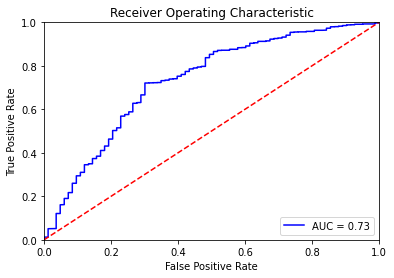

In [28]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_LDA) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

In [33]:
lassolog_model = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=2000)  # or 'liblinear'
lassolog_model.fit(X_train, y_train)
y_pred_lassolog = lassolog_model.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred_lassolog)

array([[1370,    3],
       [  83,    0]])

In [60]:
C = [50, 10, 1, .1, 0.05,.01,.001]
for c in C:
  lassologcv_model = LogisticRegression(penalty='l1',C=c,class_weight = 'balanced',solver='liblinear',max_iter=2000)
  scores = cross_val_score(lassologcv_model, X_train, y_train, cv=5, scoring="f1_micro")  
  print(scores)
  print(np.mean(scores))

[0.72425629 0.69530355 0.69530355 0.69415808 0.73081329]
0.7079669515938359
[0.72311213 0.69530355 0.6930126  0.69072165 0.72852234]
0.7061344531206997
[0.71967963 0.68613975 0.69988545 0.69530355 0.72852234]
0.7059061444137761
[0.71281465 0.65521191 0.68613975 0.68728522 0.72623139]
0.6935365831282224
[0.70022883 0.65750286 0.68155785 0.67239404 0.72164948]
0.6866666142421647
[0.6590389  0.63230241 0.64719359 0.65750286 0.68155785]
0.6555191205265517
[0.62471396 0.63230241 0.63230241 0.65521191 0.66552119]
0.6420103748089782


In [61]:
lassologcv_model = LogisticRegression(penalty='l1',C=50,class_weight = 'balanced',solver='liblinear',max_iter=2000)
lassologcv_model.fit(X_train, y_train)
y_pred_lassologcv = lassologcv_model.predict(X_test)
confusion_matrix(y_test, y_pred_lassologcv)

array([[980, 393],
       [ 35,  48]])

In [62]:
y_pred_lassologcv = lassologcv_model.predict_proba(X_test)
y_pred_lassologcv = Extract(y_pred_lassologcv)

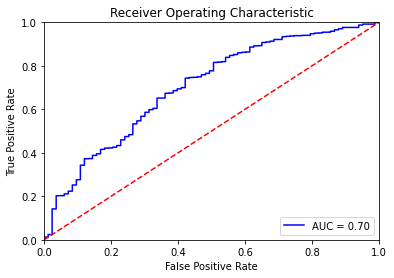

In [63]:
fpr, tpr, threshold = roc_curve((Test['Purchase'] == 'No'), y_pred_lassologcv) 
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()